# Loading the Libraries And Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

df=pd.read_csv('CloudWatch_Traffic_Web_Attack.csv')
df.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


# Checking for Null Values

In [3]:
df.isnull().sum()

bytes_in               0
bytes_out              0
creation_time          0
end_time               0
src_ip                 0
src_ip_country_code    0
protocol               0
response.code          0
dst_port               0
dst_ip                 0
rule_names             0
observation_name       0
source.meta            0
source.name            0
time                   0
detection_types        0
dtype: int64

# 1. Mean, Median, Mode

In [4]:
mean = df[['bytes_in', 'bytes_out']].mean()
median = df[['bytes_in', 'bytes_out']].median()
mode = df[['bytes_in', 'bytes_out']].mode().iloc[0]
summary_df = pd.DataFrame({'Answer': [mean, median, mode]}, index=['Mean', 'Median', 'Mode'])
summary_df

,Answer
Mean,bytes_in 1.199390e+06 bytes_out 8.45542...
Median,bytes_in 13182.0 bytes_out 13799.5 dtyp...
Mode,"bytes_in 5238 bytes_out 11674 Name: 0,..."


# 2. Min, Max, Range

In [5]:
min_values = df[['bytes_in', 'bytes_out']].min()
max_values = df[['bytes_in', 'bytes_out']].max() 
range_values = max_values - min_values
range_df = pd.DataFrame({'Answer': [min_values, max_values, range_values]}, index=['Min', 'Max', 'Range'])
range_df

,Answer
Min,bytes_in 40 bytes_out 44 dtype: int64
Max,bytes_in 25207794 bytes_out 1561220 dt...
Range,bytes_in 25207754 bytes_out 1561176 dt...


# 3. Standard Deviation

In [6]:
std_dev = df[['bytes_in', 'bytes_out']].std()
std_dev_df = pd.DataFrame({'Answer': [std_dev]}, index=['Standard Deviation'])
std_dev_df

,Answer
Standard Deviation,bytes_in 4.149312e+06 bytes_out 2.54927...


# 4. Simple Visuals

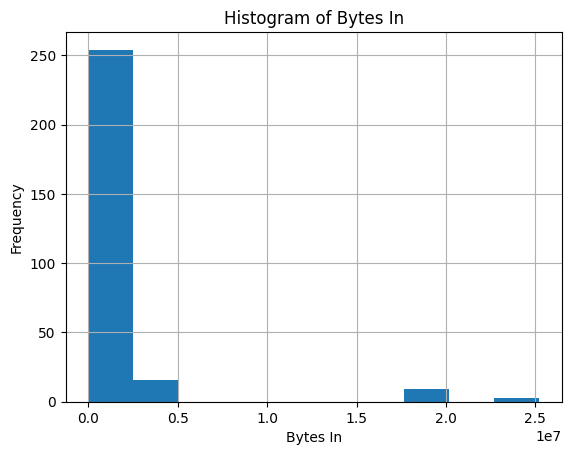

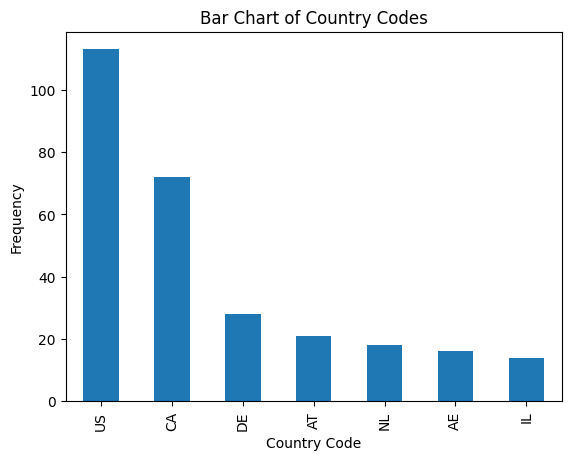

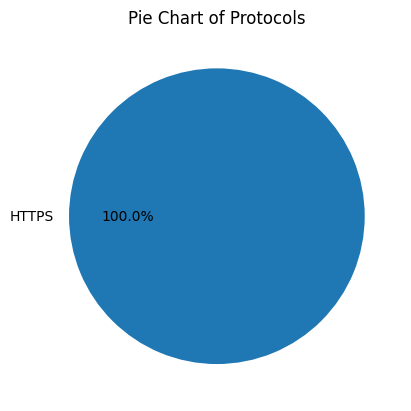

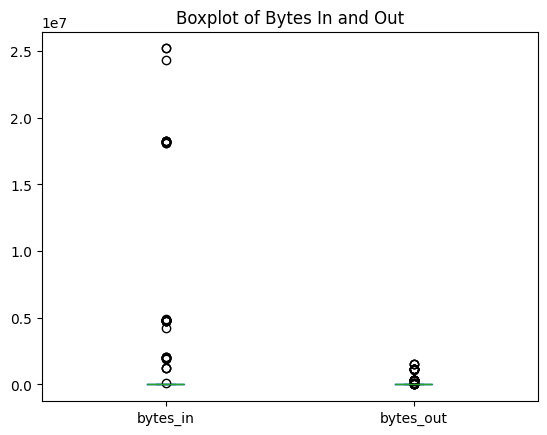

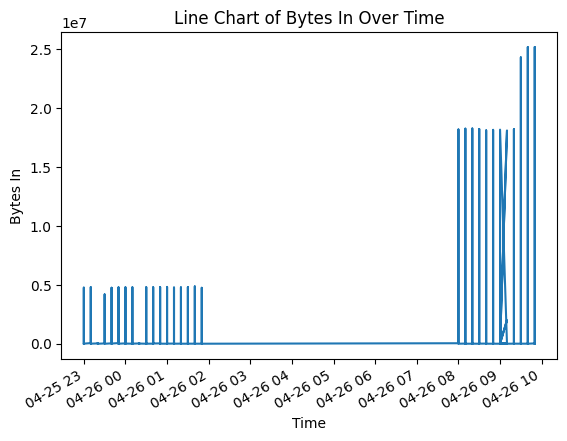

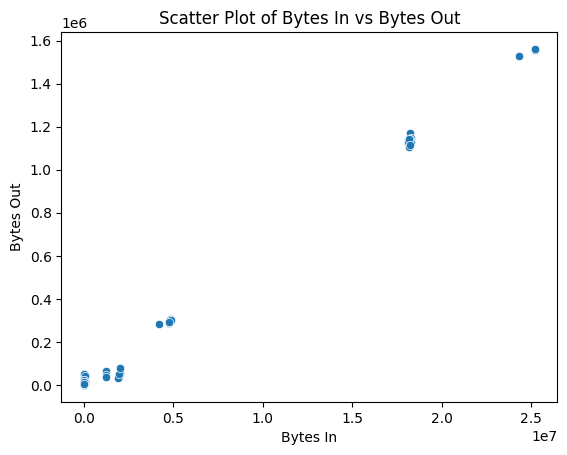

In [7]:
# Histogram
df['bytes_in'].hist(bins=10)
plt.title('Histogram of Bytes In')
plt.xlabel('Bytes In')
plt.ylabel('Frequency')
plt.show()
# Bar Chart
df['src_ip_country_code'].value_counts().plot(kind='bar')
plt.title('Bar Chart of Country Codes')
plt.xlabel('Country Code')
plt.ylabel('Frequency')
plt.show()
# Pie Chart
df['protocol'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Protocols')
plt.ylabel('')
plt.show()
# Boxplot
df[['bytes_in', 'bytes_out']].plot(kind='box')
plt.title('Boxplot of Bytes In and Out')
plt.show()
# Line Chart
df['creation_time'] = pd.to_datetime(df['creation_time'])
df.set_index('creation_time')['bytes_in'].plot(kind='line')
plt.title('Line Chart of Bytes In Over Time')
plt.xlabel('Time')
plt.ylabel('Bytes In')
plt.show()
# Scatter Plot
sns.scatterplot(x='bytes_in', y='bytes_out',data=df,)
plt.title('Scatter Plot of Bytes In vs Bytes Out')
plt.xlabel('Bytes In')
plt.ylabel('Bytes Out')
plt.show()

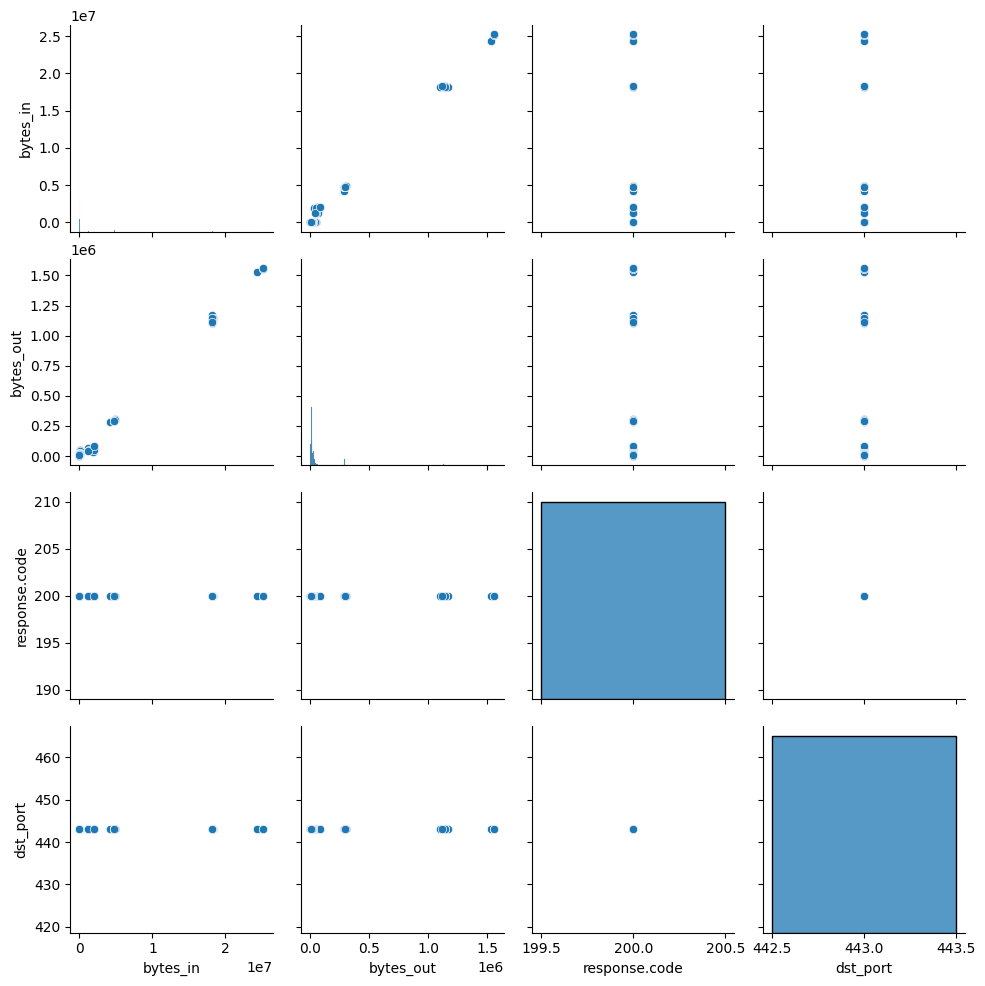

In [9]:
sns.pairplot(data=df,kind='scatter',dropna=True)